# K MEANS

# 1. Load the Mall_Customers dataset.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# 2. If require perform data preprocessing.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

I will drop CustomerID column because in this case it is unnecessary

In [7]:
df.drop(["CustomerID"], axis = 1, inplace=True)

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

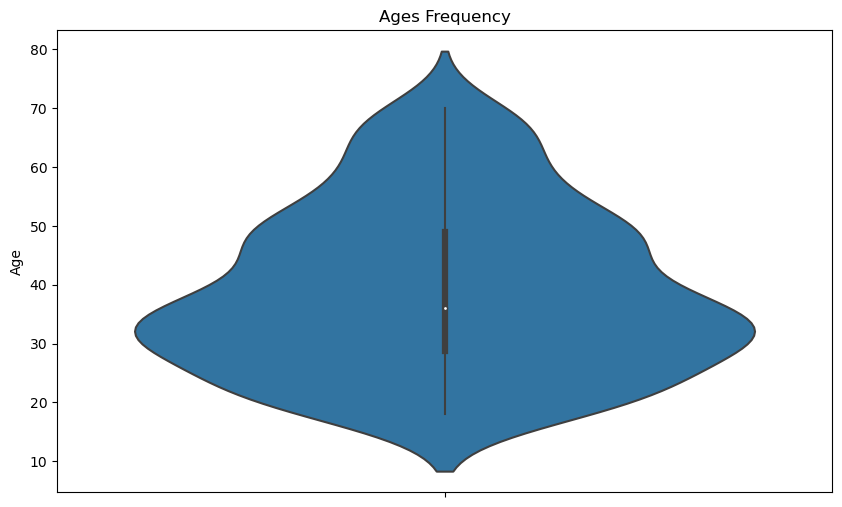

In [9]:
plt.figure(figsize=(10,6))
plt.title("Ages Frequency")
sns.axes_style("dark")
sns.violinplot(y=df["Age"])
plt.show()

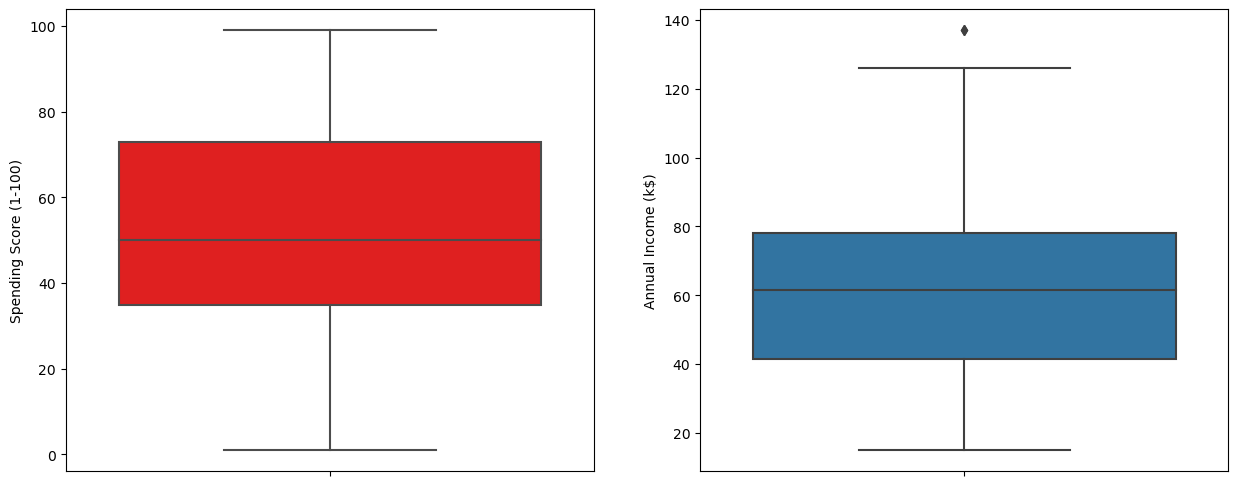

In [10]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(y=df["Spending Score (1-100)"], color="red")
plt.subplot(1,2,2)
sns.boxplot(y=df["Annual Income (k$)"])
plt.show()

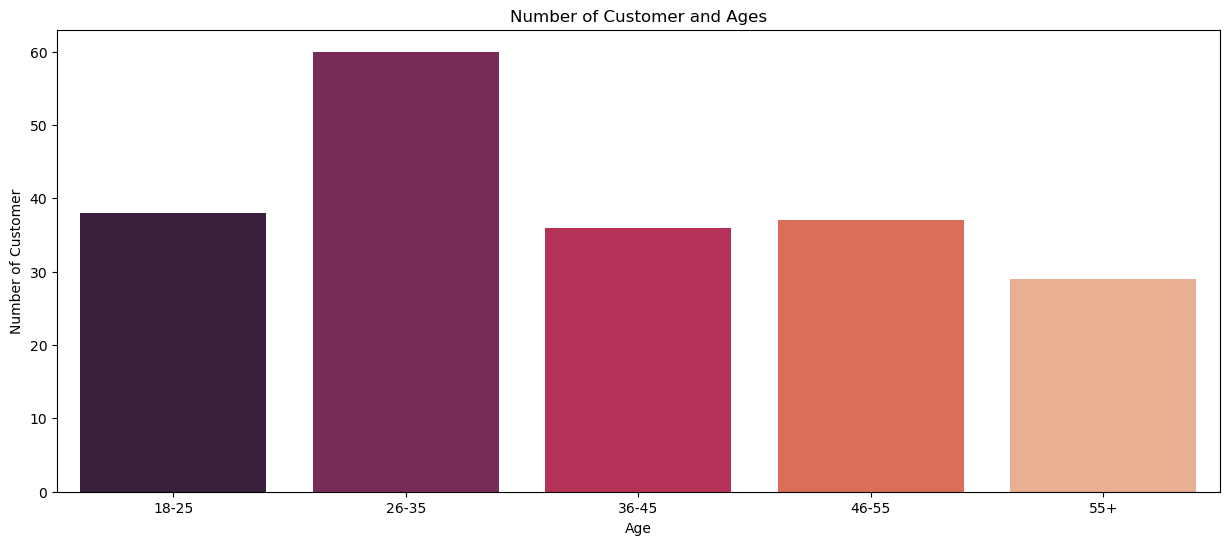

In [11]:
age18_25 = df.Age[(df.Age <= 25) & (df.Age >= 18)]
age26_35 = df.Age[(df.Age <= 35) & (df.Age >= 26)]
age36_45 = df.Age[(df.Age <= 45) & (df.Age >= 36)]
age46_55 = df.Age[(df.Age <= 55) & (df.Age >= 46)]
age55above = df.Age[df.Age >= 56]

x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

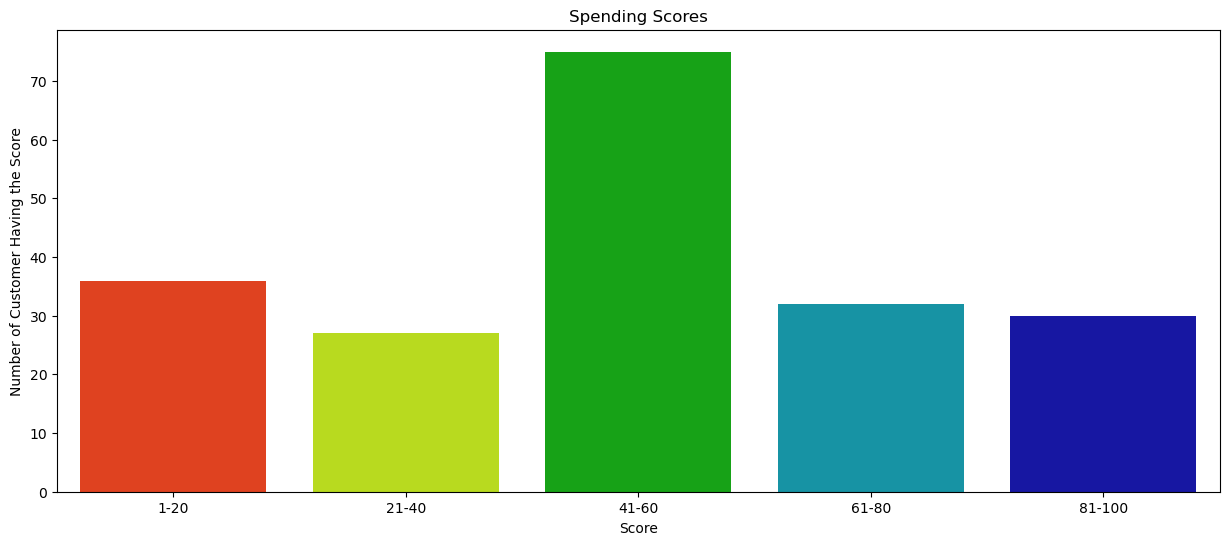

In [12]:
ss1_20 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 1) & (df["Spending Score (1-100)"] <= 20)]
ss21_40 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 21) & (df["Spending Score (1-100)"] <= 40)]
ss41_60 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 41) & (df["Spending Score (1-100)"] <= 60)]
ss61_80 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 61) & (df["Spending Score (1-100)"] <= 80)]
ss81_100 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 81) & (df["Spending Score (1-100)"] <= 100)]

ssx = ["1-20", "21-40", "41-60", "61-80", "81-100"]
ssy = [len(ss1_20.values), len(ss21_40.values), len(ss41_60.values), len(ss61_80.values), len(ss81_100.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=ssx, y=ssy, palette="nipy_spectral_r")
plt.title("Spending Scores")
plt.xlabel("Score")
plt.ylabel("Number of Customer Having the Score")
plt.show()

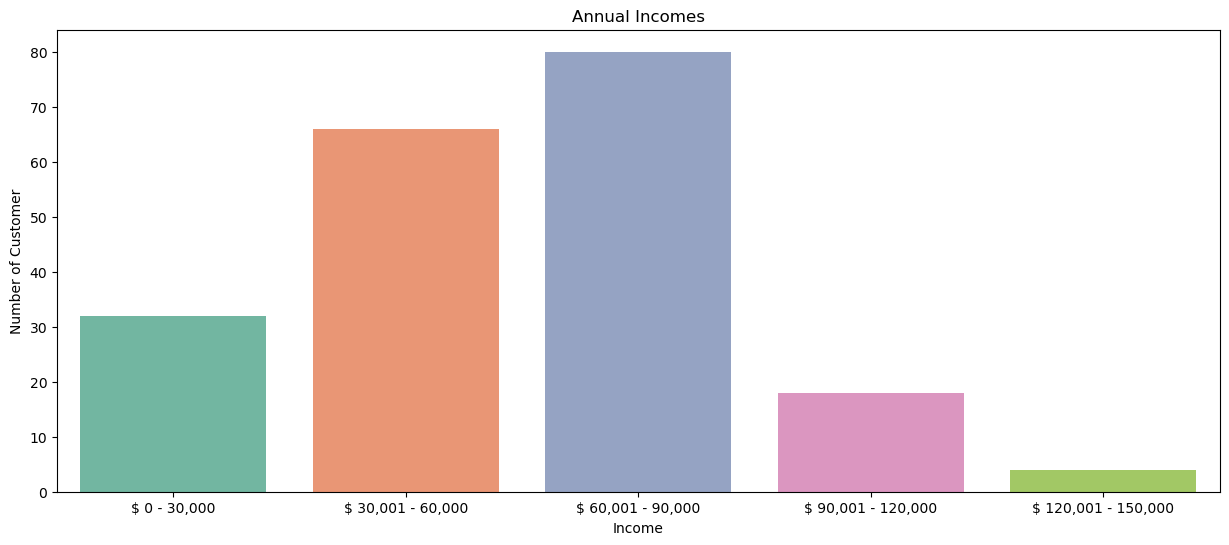

In [13]:
ai0_30 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 0) & (df["Annual Income (k$)"] <= 30)]
ai31_60 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 31) & (df["Annual Income (k$)"] <= 60)]
ai61_90 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 61) & (df["Annual Income (k$)"] <= 90)]
ai91_120 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 91) & (df["Annual Income (k$)"] <= 120)]
ai121_150 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 121) & (df["Annual Income (k$)"] <= 150)]

aix = ["$ 0 - 30,000", "$ 30,001 - 60,000", "$ 60,001 - 90,000", "$ 90,001 - 120,000", "$ 120,001 - 150,000"]
aiy = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=aix, y=aiy, palette="Set2")
plt.title("Annual Incomes")
plt.xlabel("Income")
plt.ylabel("Number of Customer")
plt.show()

In [14]:
df = df.rename(columns={"6": "Pregnancies",
    "Genre": "Gender",
    "Age": "Age",
    "Annual Income (k$)": "AIncome ",
    "Spending Score (1-100)": "Spending_Score",
})
df.head()

,Gender,Age,AIncome,Spending_Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [15]:
gender = {'Male':1, 'Female':0}

df['Gender']=df['Gender'].map(gender)
df['Gender']

0      1
1      1
2      0
3      0
4      0
      ..
195    0
196    0
197    1
198    1
199    1
Name: Gender, Length: 200, dtype: int64

# 3. Perform k-means clustering using sklearn with arbitrary number of clusters.

In [16]:
from sklearn.cluster import KMeans

In [17]:
# Set the number of clusters
n_clusters = 5

# Create a KMeans instance
kmeans = KMeans(n_clusters=n_clusters)

# 4. Draw the inferences you find out from the clustering process.

After performing k-means clustering, we can draw several inferences. Analyze the cluster centroids to understand their characteristics. Evaluate the separation between clusters to assess distinctiveness. Examine cluster sizes to identify dominant or imbalanced groups. Interpret clusters based on domain knowledge. Compare clusters with ground truth to evaluate effectiveness. Iterate and refine the process if needed. Inferences depend on context and data. Consider domain knowledge and conduct further analysis for deeper insights. Validate results and interpret with caution.

# 5. Apply elbow method and find the optimal number clusters for the given dataset.

In [18]:
!pip install --upgrade scikit-learn threadpoolctl

Defaulting to user installation because normal site-packages is not writeable


In [19]:
import warnings
warnings.simplefilter("ignore")

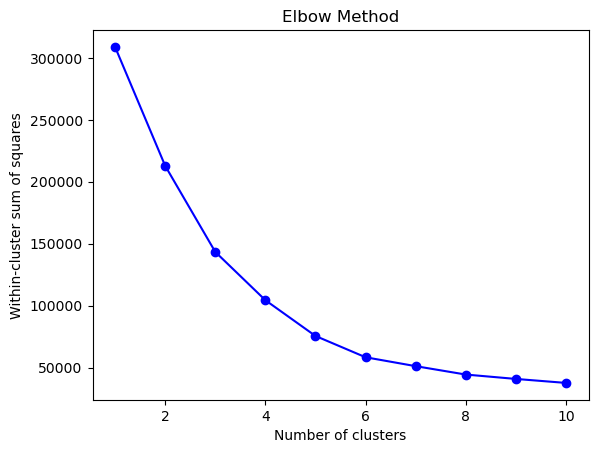

In [20]:
# Calculate the within-cluster sum of squares for different values of k
wss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df)
    wss.append(kmeans.inertia_)
# Plot the within-cluster sum of squares
plt.plot(range(1, 11), wss, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster sum of squares')
plt.title('Elbow Method')
plt.show()

# 6. Perform K-means clustering using sklearn with optimal number of clusters.

In [21]:
kmeans = KMeans(n_clusters=5)
labels = kmeans.fit_predict(df)

# 7. Draw the inferences you find out from the clustering process.¶

K-means clustering with 5 clusters was performed. Inferences include understanding cluster characteristics, assessing separation, analyzing cluster sizes, interpreting clusters based on domain knowledge, and conducting further analysis. Results should be interpreted cautiously, considering data context and validation.

# 8. Which aattributes are strongly correlated with Spending Score?

In [22]:
import pandas as pd
df = pd.DataFrame(df)

correlation_matrix = pd.DataFrame(df.corr())
print("Correlation matrix between features : \n")
print(correlation_matrix)
print()
print("Correlation between features and spending scores : \n")
corr = pd.DataFrame(df.corr()['Spending_Score'])
print(corr)

Correlation matrix between features : 

                  Gender       Age  AIncome   Spending_Score
Gender          1.000000  0.060867  0.056410       -0.058109
Age             0.060867  1.000000 -0.012398       -0.327227
AIncome         0.056410 -0.012398  1.000000        0.009903
Spending_Score -0.058109 -0.327227  0.009903        1.000000

Correlation between features and spending scores : 

                Spending_Score
Gender               -0.058109
Age                  -0.327227
AIncome               0.009903
Spending_Score        1.000000


# 9. Apply K-means clustering using sklearn with optimal number of clusters along with highly correlated features.¶

In [23]:
# Select the top 5 features that are most correlated with Spending Score
features = corr.index[:5]

# Perform K-means clustering
kmeans = KMeans(n_clusters=5)
labels = kmeans.fit_predict(df[features])

# 10. Draw the inferences you find out from the clustering process

(array([23.,  0., 39.,  0.,  0., 23.,  0., 79.,  0., 36.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

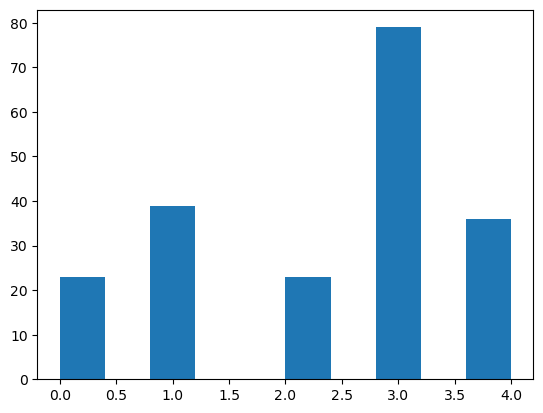

In [24]:
plt.hist(labels)